<a href="https://colab.research.google.com/github/kellykryoung/AI_Study/blob/main/textmining/01_02_Regularized_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2023.May
# Instructor: Soyeon, Lee
# Regularized Linear Regression Model_Machine Learning: 선형회귀 규제모델

In [ ]:
# total library
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## _1. Regularized Linear Regression(규제 선형 모델)

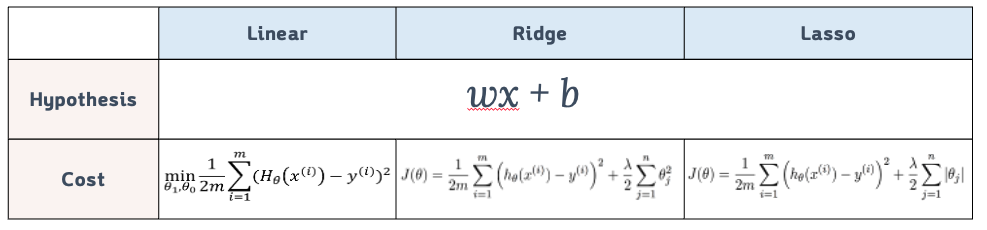

Review LinearRegression() (선형 회귀 모델 복습)


In [ ]:
#  0.Data( X, y  정의 )
rng = np.random.RandomState(1)

X = 10*rng.rand(100,3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

X.shape, y.shape

((100, 3), (100,))

In [ ]:
# 1. Model instance
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [ ]:
# 2. Model Training
LR_model.fit(X, y)

print(LR_model.coef_, LR_model.intercept_)

[ 1.5 -2.   1. ] 0.5000000000000033


In [ ]:
# 3. Model Evaluate

LR_model.score(X, y)

1.0

### _1 _01. Data Define

Data: sklearn.datasets , fetch_califorina_housing

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

# sklearn에서 x_data, y_data: ㅁ.data, ㅁ.target
x_data = housing.data
y_data = housing.target

EDA & data preprocessing

In [ ]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
x_data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
y_data

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_data_scaled = std_scaler.fit_transform(x_data)

In [ ]:
# Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data_scaled, y_data, random_state = 42, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

### _1. _02. Review LinearRegression model

In [ ]:
# LinearRegression/Ridge/Lusso 비교를 위해

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(LR_model.coef_)
print(LR_model.coef_.max())
print(LR_model.coef_.min())
print(np.mean(LR_model.coef_))

[ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682]
0.8523816881485069
-0.8966350465633477
-0.09546300105254849


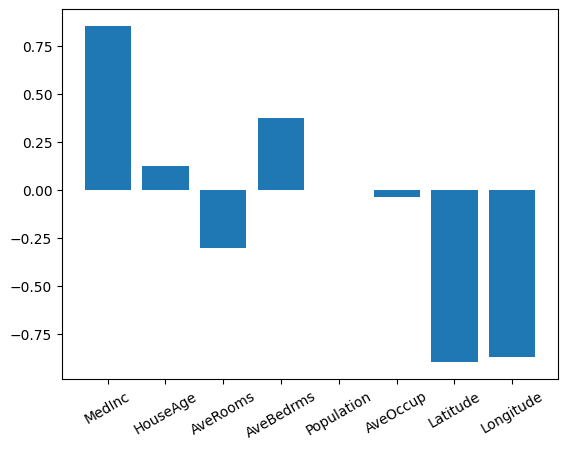

In [ ]:
# Visualization

# x_labels: housing.feature_names
plt.bar(housing.feature_names, LR_model.coef_)
plt.xticks(rotation=30) # x_label angle
plt.show()

## _2. Ridge

Ridge model Training

In [ ]:
from sklearn.linear_model import Ridge

# 2 steps => 1 step
RG_model = Ridge(alpha=0.1).fit(X_train, y_train)

# 3 weight
print("weight :", RG_model.coef_)
print("weight max :", RG_model.coef_.max())
print("weight min :",RG_model.coef_.min())
print("weight mean :",np.mean(RG_model.coef_))

## 최대값을 갖는 위치(인덱스)
print("index of the weight_max :",RG_model.coef_.argmax())

## 최소값을 갖는 위치(인덱스)
print("index of the weight_min :",RG_model.coef_.argmin())

weight : [ 0.85237453  0.12239003 -0.3050914   0.37110054 -0.00229586 -0.03662399
 -0.89655993 -0.86885057]
weight max : 0.852374532653625
weight min : -0.8965599266050713
weight mean : -0.09544458255470825
index of the weight_max : 0
index of the weight_min : 6


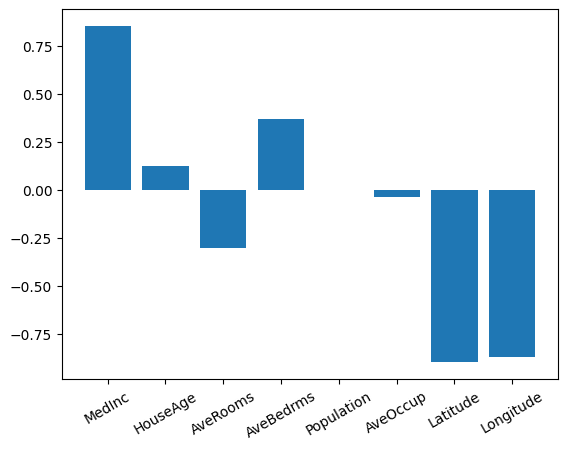

In [ ]:
# 4  Visualizaion

plt.bar(housing.feature_names, RG_model.coef_)
plt.xticks(rotation=30)
plt.show()

#### Ridge_Practice
* Ridge model.
* alpha =[0.0 001, 0.1, 1, 10, 100, 10000].
* coef_의 값들을 시각화(barplot).
* text로 r2_score도 함께 시각화

alpha: 0.0001
R2 train: 0.6125511913966946
R2 test: 0.5757877091253641


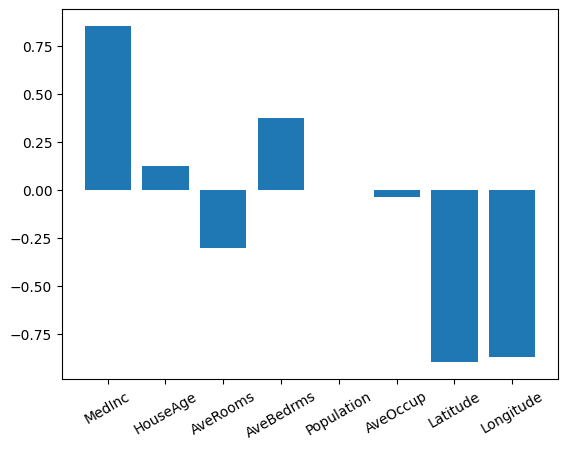

alpha: 0.1
R2 train: 0.6125511906815898
R2 test: 0.5757907979394903


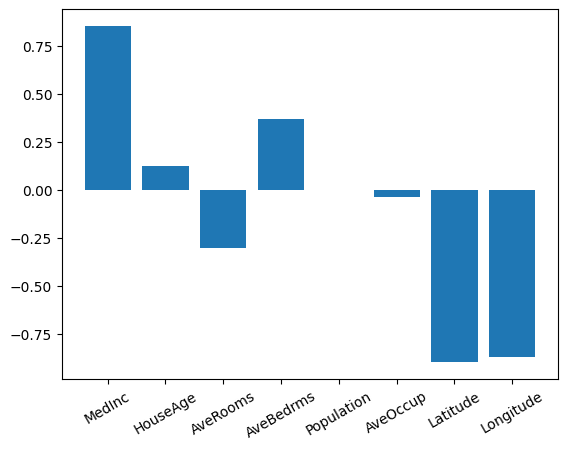

alpha: 1
R2 train: 0.612551119993334
R2 test: 0.575818534544132


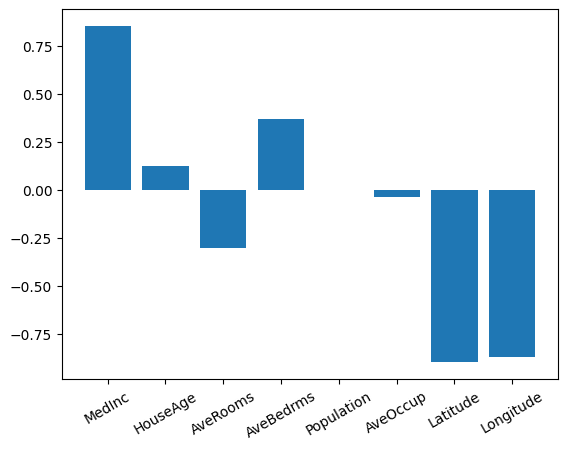

alpha: 10
R2 train: 0.6125441568220719
R2 test: 0.5760870567061362


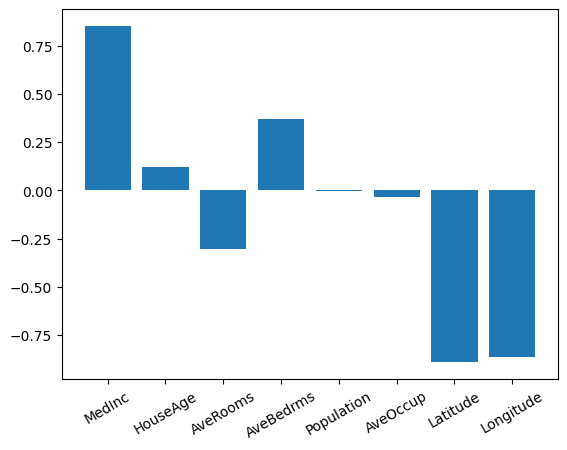

alpha: 100
R2 train: 0.6119410426988514
R2 test: 0.5779965419455848


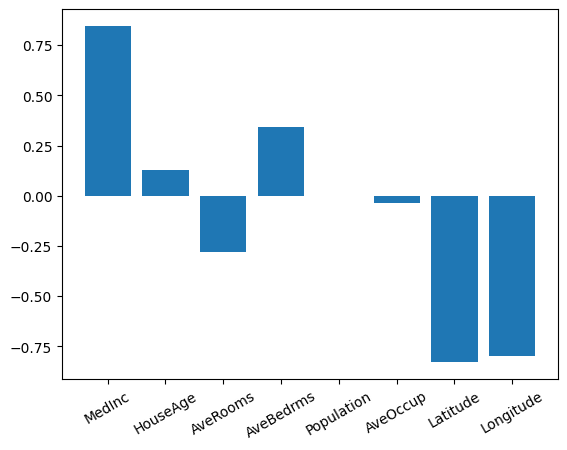

alpha: 10000
R2 train: 0.45877217019413974
R2 test: 0.4477514631600443


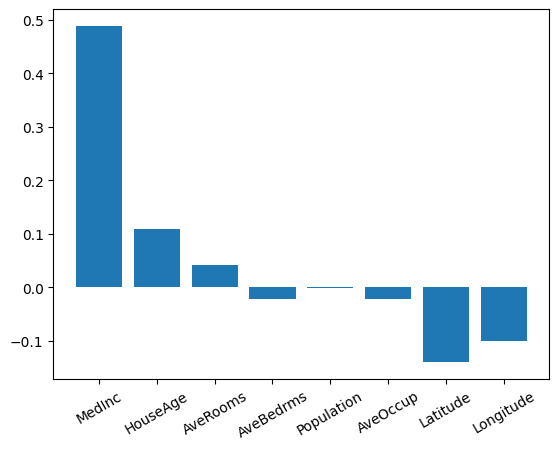

In [ ]:
from sklearn.metrics import r2_score

# alpha값(람다값이) 커지면 커질수록 0에 가까워진다. (But, 0은 되지 않음)

alpha_list = [0.0001, 0.1, 1, 10, 100, 10000]
for i in alpha_list:

    # call the model
    RG_model = Ridge(alpha=i)

    # fit the model
    RG_model.fit(X_train, y_train) # housing data

   # score
    r2_train = RG_model.score(X_train, y_train)
    r2_test = RG_model.score(X_test, y_test)

    print('alpha:', i)
    print('R2 train:', r2_train)
    print('R2 test:', r2_test)


    # visulize the coeficient
    plt.bar(housing.feature_names, RG_model.coef_ ) #x, y
    plt.xticks(rotation=30)
    plt.show()

## _3. Lasso

In [ ]:
from sklearn.linear_model import Lasso

LSS_model = Lasso(alpha = 0.001)

In [ ]:
LSS_model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
LSS_model.coef_

array([ 0.84677361,  0.12319172, -0.29057195,  0.35575098, -0.00105138,
       -0.0358658 , -0.8857684 , -0.8573757 ])

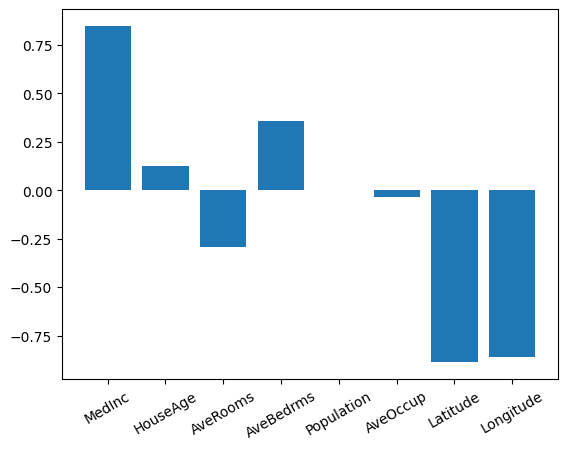

In [ ]:
# Visualization

plt.bar(housing.feature_names, LSS_model.coef_)
plt.xticks(rotation=30)
plt.show()

### Lasso_Practice
* Lasso
* alpha= [0.0001, 0.1, 1, 10, 100, 10000]
* visualize model.coef_ in barplot
* text로 r2_score도 함께 시각화

alpha: 0.0001
R2_train : 0.6125507488721316
R2_test : 0.5759064004198498


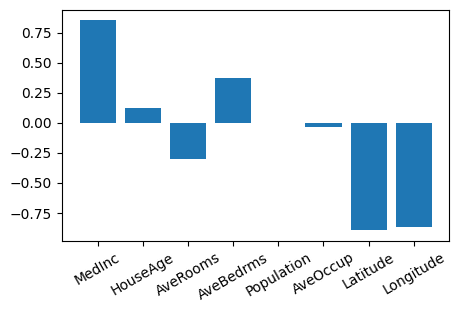

alpha: 0.1
R2_train : 0.497483148186155
R2_test : 0.4814202815313765


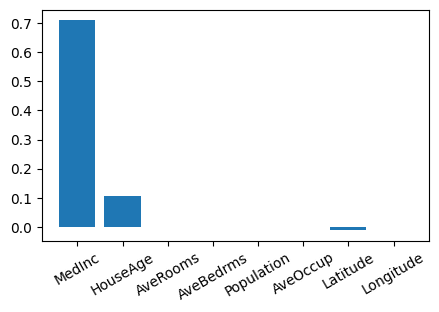

alpha: 1
R2_train : 0.0
R2_test : -0.00021908714592466794


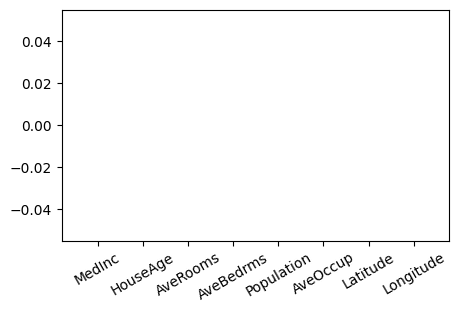

alpha: 10
R2_train : 0.0
R2_test : -0.00021908714592466794


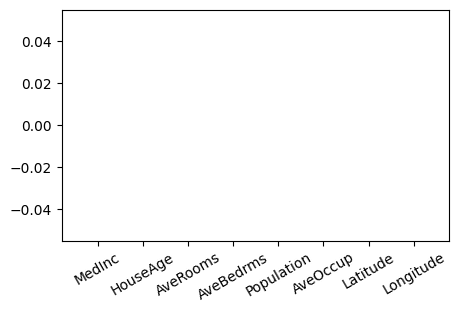

alpha: 100
R2_train : 0.0
R2_test : -0.00021908714592466794


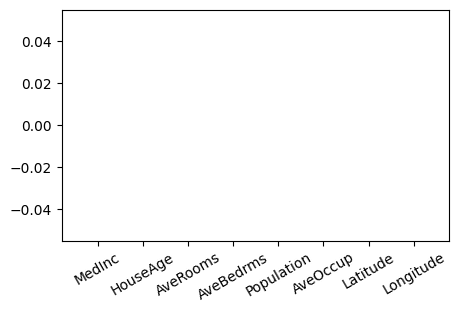

alpha: 10000
R2_train : 0.0
R2_test : -0.00021908714592466794


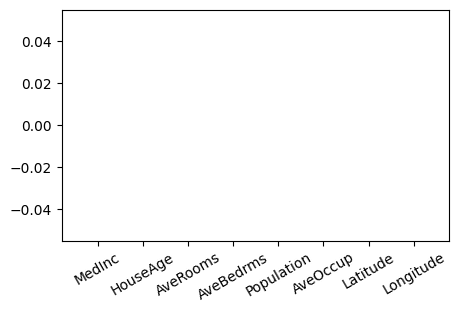

In [ ]:
# alpha값(람다값이) 커지면 커질수록 0에 가까워진다. (But, 0은 되지 않아요.)

alpha_list = [0.0001, 0.1, 1, 10, 100, 10000]

for i in alpha_list:
    print('alpha:', i)

    # call the model
    LSS_model = Lasso(alpha=i)
    LSS_model.fit(X_train, y_train)
    #y_pred = LSS_model.predict(X_train)
    #y_test_pred = LSS_model.predict(X_test)

    # evalutate
    R2_train = LSS_model.score(X_train, y_train)
    R2_test = LSS_model.score(X_test, y_test)
    print("R2_train :" ,R2_train )
    print("R2_test :", R2_test)

    # Visualization
    plt.figure(figsize=(5,3))
    plt.bar(housing.feature_names, LSS_model.coef_)
    plt.xticks(rotation=30)
    plt.show()

## _4. Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

ELST_model = ElasticNet(alpha=0.1, l1_ratio=0.3)
ELST_model.fit(X_train, y_train)
ELST_model

ElasticNet(alpha=0.1, l1_ratio=0.3)

In [ ]:
# R2 score
ELST_model.score(X_train, y_train)

0.5499082184902451

In [ ]:
# coeficient
ELST_model.coef_

array([ 0.70860558,  0.14266817, -0.        ,  0.        ,  0.        ,
       -0.01273752, -0.29115426, -0.24859096])

### ElasticNet_Practice
* GridSearchCV
* ElasticNet의 최적 하이퍼 파라미터 찾아보기

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

ELST_model = ElasticNet()

grid_params = { 'fit_intercept' : [True, False],
               'alpha' : [0.0001, 0.1, 1, 10, 100, 10000]}

Grid_ELST_model = GridSearchCV(ELST_model, param_grid=grid_params,
                           cv =3 , refit= True, scoring='r2')
# refit : True가 디폴트, True이면 가장 좋은 파라미터 설정으로 학습시켜서 모델 반환
Grid_ELST_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.1, 1, 10, 100, 10000],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [ ]:
# Grid_serarch 의 결과값 ㅁ.cv_results_
Grid_df = pd.DataFrame(Grid_ELST_model.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]
Grid_df

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'alpha': 0.0001, 'fit_intercept': True}",0.611101,1,0.612692,0.617254,0.603357
1,"{'alpha': 0.0001, 'fit_intercept': False}",-2.600858,7,-2.571489,-2.642420,-2.588666
2,"{'alpha': 0.1, 'fit_intercept': True}",0.530709,2,0.533950,0.528162,0.530016
3,"{'alpha': 0.1, 'fit_intercept': False}",-2.669908,8,-2.666825,-2.701350,-2.641549
4,"{'alpha': 1, 'fit_intercept': True}",0.208897,3,0.206955,0.212104,0.207633
5,"{'alpha': 1, 'fit_intercept': False}",-2.993110,9,-3.012394,-3.008855,-2.958081
6,"{'alpha': 10, 'fit_intercept': True}",-0.000219,4,-0.000381,-0.000264,-0.000012
7,"{'alpha': 10, 'fit_intercept': False}",-3.212001,10,-3.229505,-3.230904,-3.175594
8,"{'alpha': 100, 'fit_intercept': True}",-0.000219,4,-0.000381,-0.000264,-0.000012
9,"{'alpha': 100, 'fit_intercept': False}",-3.212001,10,-3.229505,-3.230904,-3.175594


최적의 파라미터는 무엇이었나요?

{'alpha': 0.0001, 'l1_ratio': 1.0}

회귀 계수를 시각화해보세요.

In [ ]:
ELST_best_model = ElasticNet(alpha=0.0001, l1_ratio=1.0)
ELST_best_model.fit(X_train, y_train)
ELST_best_model.coef_

array([ 0.85182349,  0.12246366, -0.30366619,  0.36959756, -0.00217355,
       -0.03654795, -0.89554245, -0.86776634])

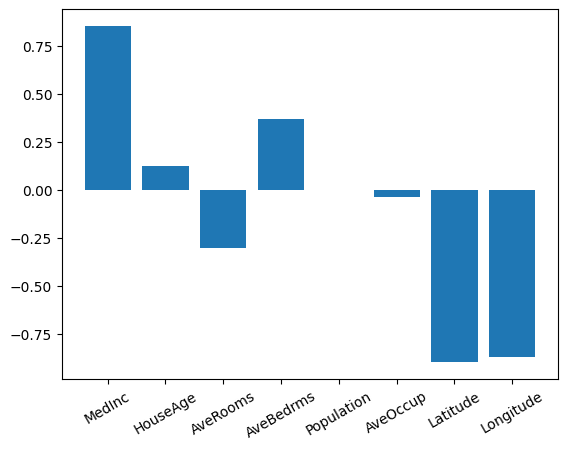

In [ ]:
# visualization
y = Grid_df['mean_test_score']
plt.bar(housing.feature_names, ELST_best_model.coef_)
plt.xticks(rotation=30)
plt.show()

In [ ]:
y_pred = ELST_best_model.predict(X_train)

Evaluate

In [ ]:
# r2 score
R2_train = ELST_best_model.score(X_train, y_train)
R2_test = ELST_best_model.score(X_test, y_test)

R2_train, R2_test

(0.6125507488721316, 0.5759064004198498)

In [ ]:
# mse (오차 제곱의 평균)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_train, squared= False)